# Getting started with the time series data

In [43]:
from numpy import *
import pandas as pd
from matplotlib.pyplot import *
from Functions import *
import warnings
warnings.filterwarnings("ignore")

In [44]:
Data = array(pd.read_csv('Data.csv',header=None))
Data_orig = Data
Data.shape

(43013, 18)

To get the number of time series in the dataset, we have to look at the unique ids in the data. Since column 2 contains the ids, so looking for number of unique values in that column

In [45]:
## The command below gives the total number of time series in the dataset
print('Total number of time series in the dataset: '+str(len(set(Data[:,1]))))  

Total number of time series in the dataset: 2789


Therefore, there are 43013 data enteries in the original dataset. This dataset 'Data' contains each observations in every time series as a new data point, so the number of datapoints are this large. The total number of time series are shown to be 2789. Now we will be visualizing the locations of the time series in the original dataset provided. Notice the locations of time series represent the patterns in which the satellite moved over this region to collect data. 

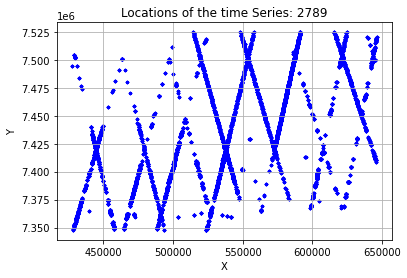

In [46]:
x = Data[:,3] ## x coordinate is in the 4rd column
y = Data[:,4] ## y coordinate is in the 5th column
scatter(x,y,color  = 'b',s = 5)
grid('on')
xlabel('X')
ylabel('Y')
title('Locations of the time Series: '+str(len(set(Data[:,1]))))
show()

#### There are 18 columns in total.

The columns of the Data array have the following headers:
1. Serial Number
2. PointID
3. Number of Points
4. X 
5. Y
6. Z
7. Kappa 
8. SIgma
9. Fitting Error
10. Date in decimal years
11. Calendar Date (MDDYY or MMDDYY)
12. Number of months relative to reference time period: August 31, 2006
13. Surface elevation relative to reference elevation (m)
14. Surface elevation error (m)
15. Firn Densification Model from RACMOGR2.3 (m)
16. Ice thickness change due to ice dynamics relative to reference elevation, surface elevation change minus FDM (m)
17. Outlier flag, surface elevation change time series (0 or 1)
18. Outlier flag, ice thickness change due to ice dynamics (0 or 1)

## Project description

In the Data object, the individual time series can be identified by their unique id in column 2. So use that id to sample the rows corresponding to a particular time series. The time instances for observations are in column 10 . Extract the corresponding height from column 16.

#### Plotting a sample time series from data (the first time series)

In [47]:
ids = sorted(set(Data[:,1])) ## getting unique time series ids in the dataset
ids[0]
size(ids)

2789

In [48]:
t = Data[Data[:,1] == ids[3],9]  ## time instances corresponding to this id
h = Data[Data[:,1] == ids[3],15] ## corresponding height measurements

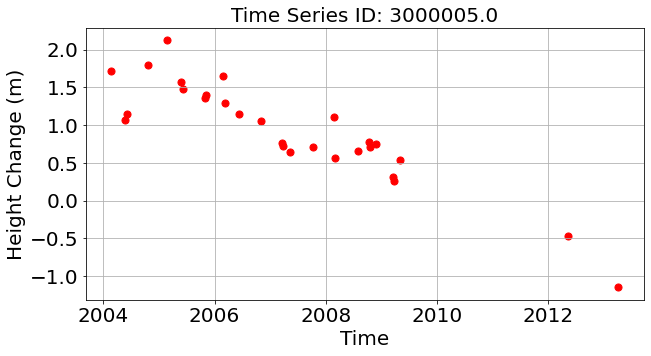

In [49]:
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(t,h,s = 50,color = 'r')
xticks(size = 20)
yticks(size = 20)
xlabel('Time',size = 20)
ylabel('Height Change (m)',size = 20)
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
grid(True)
show()

## Using the code for ALPS (Paper I shared) to predict height change at 2012

Here for the data points in the scatter plot above, we dont have an observation at 2012. Here I am showing one example of how you can use the code from that paper to predict at 2012. Use the same procedure to predict at any required time instance for all time series. 

#### Firsty showing the full approximation with bounds

In [50]:
Data = np.concatenate((t.reshape(-1,1),h.reshape(-1,1)),axis = 1)
Data

array([[ 2.0041417e+03,  1.7100000e+00],
       [ 2.0043945e+03,  1.0630000e+00],
       [ 2.0044195e+03,  1.1450000e+00],
       [ 2.0047973e+03,  1.7900000e+00],
       [ 2.0051473e+03,  2.1220000e+00],
       [ 2.0054028e+03,  1.5750000e+00],
       [ 2.0054250e+03,  1.4830000e+00],
       [ 2.0058195e+03,  1.3620000e+00],
       [ 2.0058445e+03,  1.4050000e+00],
       [ 2.0061556e+03,  1.6450000e+00],
       [ 2.0061890e+03,  1.2900000e+00],
       [ 2.0064361e+03,  1.1480000e+00],
       [ 2.0068306e+03,  1.0530000e+00],
       [ 2.0072111e+03,  7.6700000e-01],
       [ 2.0072361e+03,  7.2100000e-01],
       [ 2.0073611e+03,  6.5100000e-01],
       [ 2.0077667e+03,  7.1700000e-01],
       [ 2.0081417e+03,  1.1130000e+00],
       [ 2.0081723e+03,  5.6700000e-01],
       [ 2.0085806e+03,  6.5800000e-01],
       [ 2.0087723e+03,  7.7100000e-01],
       [ 2.0088000e+03,  7.0800000e-01],
       [ 2.0089084e+03,  7.5100000e-01],
       [ 2.0092028e+03,  3.1400000e-01],
       [ 2.00922

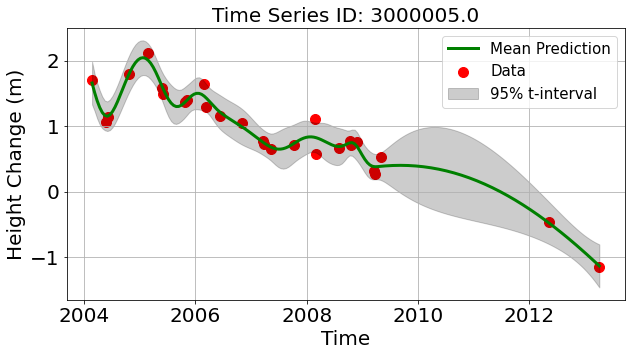

In [51]:
#figure(figsize=(20,8))
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
####### Scatter plot for the smaller time series
p = 4;q=2
scatter(t,h,color = 'r',s = 100,label = 'Data')
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = Var_bounds(Data,Bpred,B,theta,P,lamb)


ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time',size=20)
ax.set_ylabel('Height Change (m)',size = 20)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.legend(fontsize=15)
ax.grid(True)
show()

#### Predicting at t = 2012

In [52]:
xpred_2012 = np.array([2006])
Bpred_2012 = Basis_Pspline(n,p,U,xpred_2012)
ypred_2012 = Bpred_2012.dot(theta)
print('The prediction of height change at t = 2012: ',ypred_2012)

The prediction of height change at t = 2012:  [[1.49523097]]


#### Showing this prediction on the graph

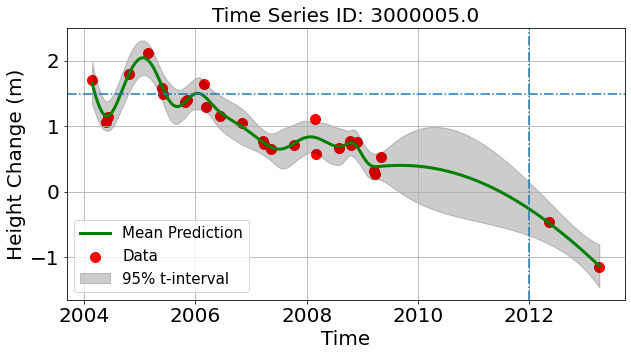

In [53]:
# Plotting code same as before
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(t,h,color = 'r',s = 100,label = 'Data')
ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.set_title('Time Series ID: '+str(ids[0]),size = 20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time',size=20)
ax.set_ylabel('Height Change (m)',size = 20)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.legend(fontsize=15)
ax.grid(True)

## adding the predicting at 2012
axvline(x = 2012,linestyle = '-.')
axhline(y = ypred_2012,linestyle = '-.')
show()

## Things to do next

1. For each time series in the dataset, make a prediction at 2006 using the same procedure as above
2. Save it into a new file dat_2006.csv. It will have rows equal to the number of time series in the dataset (2789). It will have 3 columns
    1. X coordinate of time series
    2. Y coordinate of time series
    3. Height Prediction at t = 2006
3. Once you have constructed this dat_2006.csv. Start working on the Spatial regression model which will be able to predict the height change at any new X, Y coordinate.

In [54]:
## Code to create file dat_2006.csv

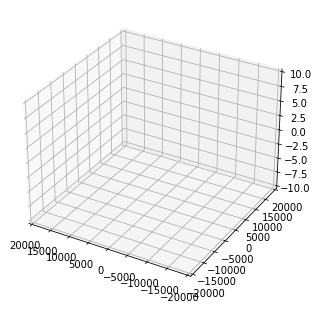

In [72]:
print('end')

end
